<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Quick-run-through" data-toc-modified-id="Quick-run-through-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Quick run through</a></span></li><li><span><a href="#Step-by-step-explanation" data-toc-modified-id="Step-by-step-explanation-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Step-by-step explanation</a></span><ul class="toc-item"><li><span><a href="#Define-your-StructCodecSpecs" data-toc-modified-id="Define-your-StructCodecSpecs-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Define your StructCodecSpecs</a></span></li><li><span><a href="#Define-your-Encoder" data-toc-modified-id="Define-your-Encoder-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Define your Encoder</a></span></li><li><span><a href="#Define-your-Decoder" data-toc-modified-id="Define-your-Decoder-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Define your Decoder</a></span></li></ul></li><li><span><a href="#Encoding-a-waveform" data-toc-modified-id="Encoding-a-waveform-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Encoding a waveform</a></span><ul class="toc-item"><li><span><a href="#Create-a-synthetic-waveform-using-hum" data-toc-modified-id="Create-a-synthetic-waveform-using-hum-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Create a synthetic waveform using <code>hum</code></a></span></li><li><span><a href="#Encode-the-wf" data-toc-modified-id="Encode-the-wf-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Encode the wf</a></span></li><li><span><a href="#Decode-and-compare-to-wf_mix" data-toc-modified-id="Decode-and-compare-to-wf_mix-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Decode and compare to wf_mix</a></span></li></ul></li><li><span><a href="#Encoding-a-pandas-dataframe" data-toc-modified-id="Encoding-a-pandas-dataframe-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Encoding a pandas dataframe</a></span><ul class="toc-item"><li><span><a href="#Create/import-your-dataframe" data-toc-modified-id="Create/import-your-dataframe-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Create/import your dataframe</a></span></li><li><span><a href="#Prep-the-dataframe-for-encoding" data-toc-modified-id="Prep-the-dataframe-for-encoding-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Prep the dataframe for encoding</a></span></li><li><span><a href="#Encode-the-list-of-dicts" data-toc-modified-id="Encode-the-list-of-dicts-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Encode the list of dicts</a></span></li></ul></li><li><span><a href="#Miscellaneous-information" data-toc-modified-id="Miscellaneous-information-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Miscellaneous information</a></span><ul class="toc-item"><li><span><a href="#Byte-order,-Size,-and-Alignment" data-toc-modified-id="Byte-order,-Size,-and-Alignment-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Byte order, Size, and Alignment</a></span></li><li><span><a href="#Performance-of-IterativeDecoder-versus-ChunkedDecoder" data-toc-modified-id="Performance-of-IterativeDecoder-versus-ChunkedDecoder-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>Performance of <code>IterativeDecoder</code> versus <code>ChunkedDecoder</code></a></span></li></ul></li></ul></div>

This notebook shows various examples of recode and it how it can be used with:
- Single channel numerical streams
- Multi-channel numerical streams
- DataFrames
- Iterators

In [1]:
from recode import (ChunkedEncoder, 
                    ChunkedDecoder, 
                    MetaEncoder, 
                    MetaDecoder, 
                    IterativeDecoder, 
                    StructCodecSpecs, 
                    specs_from_frames,
                    frame_to_meta,
                    meta_to_frame)

## Quick run through

First define the frame you want to encode

In [2]:
frame = [1,2,3]

Next define the specifications for that encoding

In [3]:
specs = StructCodecSpecs(chk_format='h')
specs

StructCodecSpecs(chk_format='h', n_channels=1, chk_size_bytes=2)

Next define an encoder and encode your frame to bytes

In [4]:
encoder = ChunkedEncoder(frame_to_chk=specs.frame_to_chk)
b = encoder(frame)
b

b'\x01\x00\x02\x00\x03\x00'

Once you need your original frame again, define a decoder and decode your frame

In [5]:
decoder = ChunkedDecoder(specs.chk_to_frame)
decoded_frames = list(decoder(b))
decoded_frames

[1, 2, 3]

## Step-by-step explanation

### Define your StructCodecSpecs

StructCodecSpecs is used to define the specs for making codecs for fixed size structured chunks serialization and deserialization of sequences, tabular data, and time-series. This definition is based on format strings of the [python struct module](https://docs.python.org/3/library/struct.html#format-strings).

There are two ways to define StructCodecSpecs, the first being to explicitly define it using the StructCodecSpecs class. StructCodecSpecs takes three arguments: `chk_format`, `n_channels`, and `chk_size_bytes`. Only `chk_format` is required, as `n_channels` and `chk_size_bytes` can be determined based on `chk_format`. If `n_channels` is given, then `chk_format` should only contain one format character, as it will be assumed that all channels have the same data type. If this is not the case, then do not provide an argument for `n_channels` and instead pass a string with the format character matching the data type for each channel in the frame to `chk_format`. For example if the first channel contains integers and the second contains floats, then `chk_format = 'hd'`.

In [6]:
frame = [1,2,3]
specs = StructCodecSpecs(chk_format='h')
specs

StructCodecSpecs(chk_format='h', n_channels=1, chk_size_bytes=2)

The second way to define StructCodecSpecs is to use `specs_from_frames` which will implictly define StructCodecSpecs based on the frame that is going to be encoded/decoded. This function will return a tuple containing an iterator of the passed frame and the defined StructCodecSpecs. The first element of the tuple can be ignored if the frame passed is not an iterator.

In [7]:
_, specs = specs_from_frames(frame)
specs

StructCodecSpecs(chk_format='h', n_channels=1, chk_size_bytes=2)

If frame is an iterator, then redefine frame as the first argument of the tuple so the first element of frame is not lost for encoding.

In [8]:
frame = iter([[1,2], [3,4]])
frame, specs = specs_from_frames(frame)
specs, list(frame)

(StructCodecSpecs(chk_format='hh', n_channels=2, chk_size_bytes=4),
 [[1, 2], [3, 4]])

### Define your Encoder

Your Encoder will allow you to, you guessed it, encode your frames! There are two Encoders currently defined in recode: `ChunkedEncoder` and `MetaEncoder`.

`ChunkedEncoder` should be your goto encoder for sequences, while `MetaEncoder` works best for tabular data (currently must be in the format of list of dicts).

In [9]:
frame = [1,2,3]
_, specs = specs_from_frames(frame)
print(specs)
encoder = ChunkedEncoder(frame_to_chk=specs.frame_to_chk)
b = encoder(frame)
b

StructCodecSpecs(chk_format='h', n_channels=1, chk_size_bytes=2)


b'\x01\x00\x02\x00\x03\x00'

When using a `MetaEncoder`, an extra argument named frame_to_meta is required, which can be easily imported from recode!

In [10]:
frame = [{'foo': 1, 'bar': 1}, {'foo': 2, 'bar': 2}, {'foo': 3, 'bar': 4}]
_, specs = specs_from_frames(frame)
print(specs)
encoder = MetaEncoder(frame_to_chk=specs.frame_to_chk, frame_to_meta=frame_to_meta)
b = encoder(frame)
b

StructCodecSpecs(chk_format='hh', n_channels=2, chk_size_bytes=4)


b'\x07\x00foo.bar\x01\x00\x01\x00\x02\x00\x02\x00\x03\x00\x04\x00'

### Define your Decoder

Next up your Decoder will allow you to decode your encoded bytes. There are three Encoders currently defined in recode: `ChunkedDecoder`, `IterativeDecoder`, and `MetaDecoder`.

Either `ChunkedDecoder` or `IterativeDecoder` will work well for sequences, with the only difference being that `IterativeDecoder` returns an iterator of decoded chunks while `ChunkedDecoder` returns a mapping which can be converted to an iterable. `MetaDecoder` works best for tabular data encoded with `MetaEncoder`. 

In [11]:
frame = [1,2,3]
_, specs = specs_from_frames(frame)
print(specs)
encoder = ChunkedEncoder(frame_to_chk=specs.frame_to_chk)
decoder = ChunkedDecoder(specs.chk_to_frame)
b = encoder(frame)
list(decoder(b))

StructCodecSpecs(chk_format='h', n_channels=1, chk_size_bytes=2)


[1, 2, 3]

As is shown in the following example, an `IterativeDecoder` will return an unpack_iterator which which can easily be converted to a standard iterable like a list, or be used as an iterator.

In [12]:
frame = [[1,1],[2,2]]
_, specs = specs_from_frames(frame)
print(specs)
encoder = ChunkedEncoder(frame_to_chk=specs.frame_to_chk)
decoder = IterativeDecoder(chk_to_frame=specs.chk_to_frame)
b = encoder(frame)
iter_frames = decoder(b)
print(type(iter_frames))
next(iter_frames), next(iter_frames)

StructCodecSpecs(chk_format='hh', n_channels=2, chk_size_bytes=4)
<class 'unpack_iterator'>


((1, 1), (2, 2))

When using a `MetaDecoder`, an extra argument named meta_to_frame is required, which can be easily imported from recode!

In [13]:
frame = [{'foo': 1, 'bar': 1}, {'foo': 2, 'bar': 2}, {'foo': 3, 'bar': 4}]
_, specs = specs_from_frames(frame)
print(specs)
encoder = MetaEncoder(frame_to_chk=specs.frame_to_chk, frame_to_meta=frame_to_meta)
decoder = MetaDecoder(chk_to_frame=specs.chk_to_frame, meta_to_frame=meta_to_frame)
b = encoder(frame)
decoded_frames = decoder(b)
decoded_frames

StructCodecSpecs(chk_format='hh', n_channels=2, chk_size_bytes=4)


[{'foo': 1, 'bar': 1}, {'foo': 2, 'bar': 2}, {'foo': 3, 'bar': 4}]

## Encoding a waveform

### Create a synthetic waveform using `hum`

In [14]:
from hum.gen.sine_mix import freq_based_stationary_wf
import matplotlib.pyplot as plt
import numpy as np

DFLT_N_SAMPLES = 21 * 2048
DFLT_SR = 44100

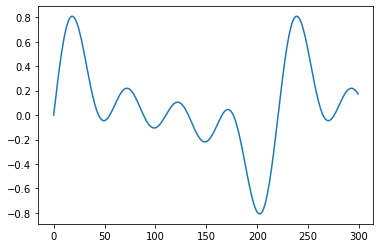

In [15]:
wf_mix = freq_based_stationary_wf(freqs=(200, 400, 600, 800), weights=None,
                             n_samples = DFLT_N_SAMPLES, sr = DFLT_SR)
plt.plot(wf_mix[:300]);

In [16]:
wf_mix

array([0.        , 0.07114157, 0.14170624, ..., 0.49480205, 0.54853009,
       0.5979443 ])

### Encode the wf

In [17]:
specs = StructCodecSpecs('d')
encoder = ChunkedEncoder(frame_to_chk=specs.frame_to_chk)
decoder = ChunkedDecoder(chk_to_frame=specs.chk_to_frame)
b = encoder(wf_mix)
b[:100]

b'\x00\x00\x00\x00\x00\x00\x00\x00\x1b:\x11\x8dU6\xb2?\xb8!\xa2\x15n#\xc2?\xe6I\xedz\x15\x06\xcb?L;\xe6\xfah\xd8\xd1?}\x8c\x9b\x9a\xf5\x08\xd6?D\xcc\xf1\x897\x0c\xda?\xe3\xc5\xbeb/\xda\xdd?DE\xb6K\xb6\xb5\xe0?\x82|\xfcz\x90\\\xe2?\xae3:$\x99\xde\xe3?\x1e\x95\xbe\xef$9\xe5?\x81\xd7\xdc\xec'

### Decode and compare to wf_mix

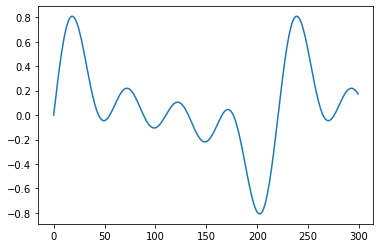

In [18]:
decoded_wf_mix = decoder(b)
plt.plot(decoded_wf_mix[:300]);

In [19]:
np.all(decoded_wf_mix == wf_mix)

True

## Encoding a pandas dataframe

In [20]:
import pandas as pd

### Create/import your dataframe

In [21]:
df = pd.DataFrame(data = [[1,2,3],[4,5,6]], columns = ['foo', 'bar', 'set'])
df

,foo,bar,set
0,1,2,3
1,4,5,6


### Prep the dataframe for encoding

In [22]:
frame = df.to_dict('records')
frame

[{'foo': 1, 'bar': 2, 'set': 3}, {'foo': 4, 'bar': 5, 'set': 6}]

### Encode the list of dicts

In [23]:
_, specs = specs_from_frames(frame)
encoder = MetaEncoder(frame_to_chk=specs.frame_to_chk, frame_to_meta=frame_to_meta)
decoder = MetaDecoder(chk_to_frame=specs.chk_to_frame, meta_to_frame=meta_to_frame)
b = encoder(frame)
b

b'\x0b\x00foo.bar.set\x01\x00\x02\x00\x03\x00\x04\x00\x05\x00\x06\x00'

In [24]:
decoded_frame = decoder(b)
decoded_frame

[{'foo': 1, 'bar': 2, 'set': 3}, {'foo': 4, 'bar': 5, 'set': 6}]

In [25]:
decoded_df = pd.DataFrame(decoded_frame)
print(np.all(decoded_df == df))
decoded_df

True


,foo,bar,set
0,1,2,3
1,4,5,6


## Miscellaneous information

### Byte order, Size, and Alignment

This table provides the characters associated with Byte order, Size, and Alignment. If one of these characters is not given as the first character of the format string, then `@` will be assumed. More information about Byte order, Size, and Alignment can be found [here](https://docs.python.org/3/library/struct.html#byte-order-size-and-alignment).

|Character|Byte order|Size|Alignment|
|---------|----------|----|---------|
|@|native|native|native|
|=|native|standard|none|
|<|little-endian|standard|none|
|>|big-endian|standard|none|
|!|network (=big-endian)|standard|none|

### Performance of `IterativeDecoder` versus `ChunkedDecoder`
ChunkedDecoder has been changed based on this, so this code likely will not run correctly

In [29]:
from hum.gen.sine_mix import freq_based_stationary_wf
from recode import (ChunkedEncoder, 
                    ChunkedDecoder, 
                    IterativeDecoder, 
                    StructCodecSpecs)

In [30]:
DFLT_N_SAMPLES = 21 * 2048
DFLT_SR = 44100

wf_mix = freq_based_stationary_wf(freqs=(200, 400, 600, 800), weights=None,
                             n_samples = DFLT_N_SAMPLES*300, sr = DFLT_SR)

In [31]:
specs = StructCodecSpecs('d')
encoder = ChunkedEncoder(frame_to_chk=specs.frame_to_chk)
decoder = ChunkedDecoder(
    chk_size_bytes=specs.chk_size_bytes,
    chk_to_frame=specs.chk_to_frame,
    n_channels=specs.n_channels
)
idecoder = IterativeDecoder(chk_to_frame = specs.chk_to_frame_iter)
b = encoder(wf_mix)

In [32]:
def it_to_list(it):
    frame = list(it)
    frame = [item for tup in frame for item in tup]
    return frame

In [33]:
%timeit -r 2 -n 5 list(decoder(b))

5.59 s ± 14.5 ms per loop (mean ± std. dev. of 2 runs, 5 loops each)


In [34]:
%timeit -r 2 -n 5 it_to_list(idecoder(b))

2.04 s ± 13.4 ms per loop (mean ± std. dev. of 2 runs, 5 loops each)
